# Character Recognition Tool
### Created by 
### Joshua Baldwin - Michigan State University
### Ralf Schmaelzle - Michigan State University

# Instructions

## Install Packages

In [1]:
#!pip install pliers
#!pip install python-magic
#!pip install face_recognition 
#!pip3 install --upgrade pandas
#!pip install libmagic
#!brew upgrade cmake
#!homebrew, ffmpeg, dlib
#!brew install  dlib
#!brew install libmagic

## Import Tools

In [2]:
import os 
from os.path import join
import numpy as np

from pliers.tests.utils import get_test_data_path
from pliers.extractors import (FaceRecognitionFaceLocationsExtractor, FaceRecognitionFaceEncodingsExtractor, 
                               FaceRecognitionFaceLandmarksExtractor,SaliencyExtractor, BrightnessExtractor, merge_results)
from pliers.filters import FrameSamplingFilter
import face_recognition
from pliers.graph import Graph
import pandas as pd 
import sys


## Name your project and direct input files
### Please insert your project name
### Please direct your video files
### Please direct your reference images
### Please indicate the number of reference images
### Please indicate the names of the characters

In [17]:
#Name the Project Below
project_name = 'Project_Name'

#Import Video
video_reference = '../data/input_data/videos/Shark_Tank/Shark_Tank.mp4'

#Import Reference Images 
images = os.listdir('../data/input_data/reference_images/Shark_Tank/')
images_reference = '../data/input_data/reference_images/Shark_Tank/'
#How Many Known Images?
n_images = 7  
print(n_images)

#What are the Names of the Characters (Alphabetical)?
character_names = [  'Barbara_Corcoran',
                     'Chris_Sacca',
                     'Daymond_John',
                     'Kevin_O_Leary',
                     'Lori_Greiner',
                     'Mark_Cuban',
                     'Robert_Herjavec',
                  ]
n_characters = len(character_names)

rate = 4450 #change to value you prefer (values near 1 are more accurate, higher values will skip frames...)

7


## Describe input 

In [18]:
sampler = FrameSamplingFilter(every = rate)
frames = sampler.transform(video_reference)
n_frames = frames.n_frames
n_frames_analyze = round(n_frames/24)
print('This video has ' + str(n_frames) + ' frames')

This video has 17 frames


## Face Recognition Extractor

In [19]:
character_images = []
for currs in character_names:
    cname = currs + '.jpg'
    character_images.append(cname)
    
character_images

['Barbara_Corcoran.jpg',
 'Chris_Sacca.jpg',
 'Daymond_John.jpg',
 'Kevin_O_Leary.jpg',
 'Lori_Greiner.jpg',
 'Mark_Cuban.jpg',
 'Robert_Herjavec.jpg']

### Set up face-encodings of known images 

In [23]:
known_faces = []

for character in character_images:
    known_character_image =  face_recognition.load_image_file(images_reference + character)
    known_character_encoding = face_recognition.face_encodings(known_character_image)[0]
    print (character)
    known_faces.append(known_character_encoding)
    

len(known_faces)

Barbara_Corcoran.jpg
Chris_Sacca.jpg
Daymond_John.jpg
Kevin_O_Leary.jpg
Lori_Greiner.jpg
Mark_Cuban.jpg
Robert_Herjavec.jpg


7

## Go through frames, detect faces, match them to templates, and create output

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [ ]:
face_locations[0][3]

In [40]:
face_locations[0][3]

459

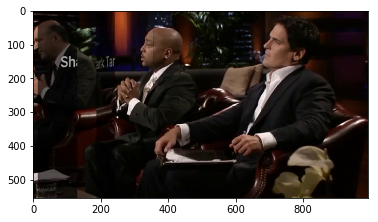

I see face!


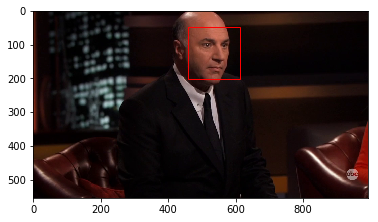

I see face!


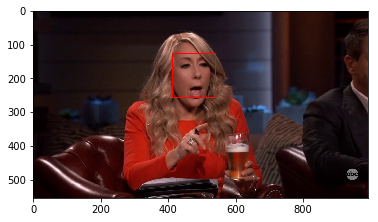

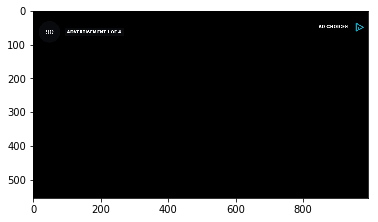

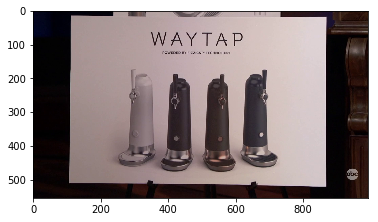

I see face!


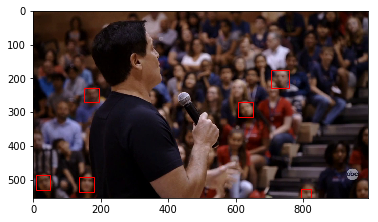

i see a new face


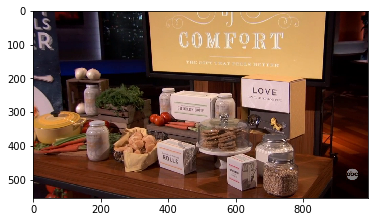

I see face!


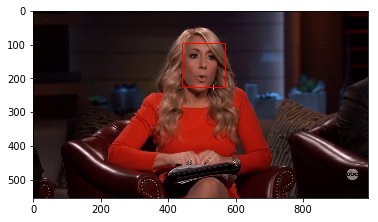

I see face!


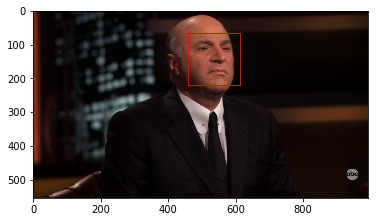

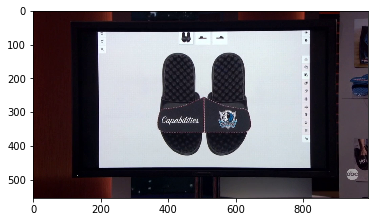

I see face!


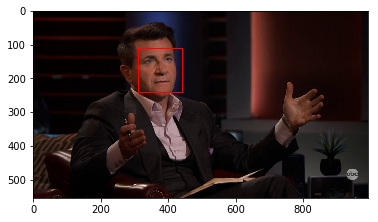

I see face!


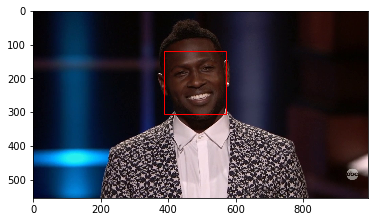

i see a new face


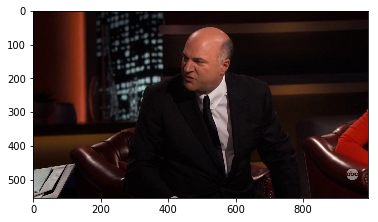

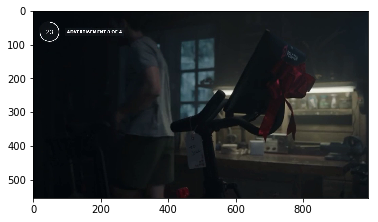

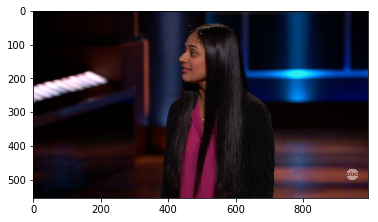

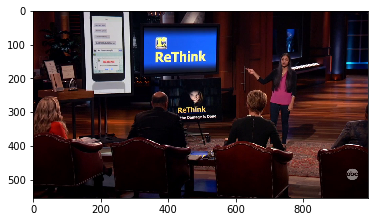

I see face!


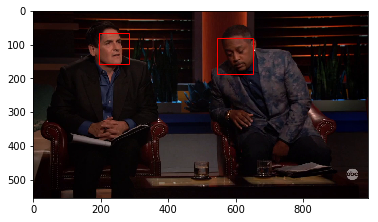

i see a new face


,Barbara_Corcoran,Chris_Sacca,Daymond_John,Kevin_O_Leary,Lori_Greiner,Mark_Cuban,Robert_Herjavec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
res = []
for curr_frame_number in np.arange(0, n_frames, 1):
    sys.stdout.write(" %d, \r" % (curr_frame_number) )
    sys.stdout.flush()
    
    # load the current frame as an image
    curr_frame = frames.get_frame(curr_frame_number).video.get_frame(curr_frame_number).video.get_frame(curr_frame_number).data

    # display for now
    fig, ax = plt.subplots(1)
    ax.imshow(curr_frame)

    # detect faces and plot them (for now) based on location info...
    face_locations = face_recognition.face_locations(curr_frame)
    if len(face_locations)>0:
        print('I see face!')
        for curr_face in range(len(face_locations)):
        
            l1 = (face_locations[curr_face][2] - face_locations[curr_face][0])
            l2 = (face_locations[curr_face][1] - face_locations[curr_face][3])
            rect = patches.Rectangle((face_locations[curr_face][3], face_locations[curr_face][0]), l1,l2, edgecolor = 'r', facecolor='none')

            ax.add_patch(rect)

    
    plt.show()
    sys.stdout.flush()
    
    # for all detected faces, compute their encodings....
    face_encodings = face_recognition.face_encodings(curr_frame, face_locations)

    if len(face_encodings)>0 :
        
        # compare the recognizes&encoded faces with the known faces' encodings....
        results = face_recognition.compare_faces(known_faces, face_encodings[0])
        
        #### This is where we do the surgery to add the unknown/feedback/human in the loop part
        
        # if more faces are detected than recognized, then we conclude that new faces are present
        if (len(face_encodings) > sum(results)):
            print('i see a new face')
            
            #cut out the new faces and put them in folder...
            for current_face_seen in range(len(face_encodings[0]))
            
            
            face_recognition.compare_faces(known_faces, face_encodings[0])
            
        
        
        ####
        
        
        #append the results...
        res.append(results)
    else:
        res.append([False] * n_images)
        
res2 = np.asarray(res)
np.asarray(res2[0])

new_result = np.zeros((n_frames,n_characters))

for this_line in range(n_frames):
    new_result[this_line,:] = np.asarray(res2[this_line])

df2 = pd.DataFrame( data    = new_result,
                    columns = character_names );
df2.to_csv('../data/output_data/' + project_name + '_face_recognition.csv')
df2

In [56]:
len(face_encodings)


2

In [51]:
len(face_encodings)

2